In [1]:
import sys
sys.path.append('/NDDepth/Estimation/nddepth_custom')

In [2]:
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch.backends.cudnn as cudnn
from networks.NewCRFDepth import NewCRFDepth
from utils import post_process_depth, flip_lr, compute_errors
import open3d as o3d
from networks.depth_anything_interface import get_model

IMG_PATH = "/scratchdata/nyu_depth_v2/official_splits/test/kitchen/rgb_00201.jpg"
DEPTH_PATH = "/scratchdata/nyu_depth_v2/official_splits/test/kitchen/sync_depth_00201.png"
MODEL_PATH = "/scratchdata/test.pth"

DEPTH_ANYTHING_PATH = "/scratchdata/depth_anything_v2_metric_hypersim_vitl.pth"
DEPTH_ANYTHING_ENCODER='vitl'
DEPTH_ANYTHING_MAX_DEPTH=20.0
depth_anything_model = get_model("cpu", DEPTH_ANYTHING_PATH, encoder=DEPTH_ANYTHING_ENCODER, max_depth=DEPTH_ANYTHING_MAX_DEPTH)

ENCODER = "large07"
MAX_DEPTH = 10
EPOCH = 5

torch.manual_seed(42)

model = NewCRFDepth(version=ENCODER, inv_depth=False, max_depth=MAX_DEPTH, pretrained=None, 
                    depth_anything_model=depth_anything_model).to("cuda")
model.train()
num_params = sum([np.prod(p.size()) for p in model.parameters()])
print("== Total number of parameters: {}".format(num_params))

num_params_update = sum([np.prod(p.shape) for p in model.parameters() if p.requires_grad])
print("== Total number of learning parameters: {}".format(num_params_update))

model = torch.nn.DataParallel(model)
model.cuda()

checkpoint = torch.load(MODEL_PATH, map_location='cpu')
model.load_state_dict(checkpoint['model'])
print("== Loaded checkpoint '{}'".format(MODEL_PATH))
del checkpoint

print("== Model Initialized")
cudnn.benchmark = True


/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


xFormers not available
xFormers not available
/NDDepth/Estimation/nddepth_custom/networks/depth_anything_interface.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model

== Load encoder backbone from: None
== Total number of parameters: 683715788
== Total number of learning parameters: 683715788


/tmp/ipykernel_48479/2777247367.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(MODEL_PATH, map_location='cpu')


RuntimeError: Error(s) in loading state_dict for DataParallel:
	Missing key(s) in state_dict: "module.depth_anything_model.pretrained.cls_token", "module.depth_anything_model.pretrained.pos_embed", "module.depth_anything_model.pretrained.mask_token", "module.depth_anything_model.pretrained.patch_embed.proj.weight", "module.depth_anything_model.pretrained.patch_embed.proj.bias", "module.depth_anything_model.pretrained.blocks.0.norm1.weight", "module.depth_anything_model.pretrained.blocks.0.norm1.bias", "module.depth_anything_model.pretrained.blocks.0.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.0.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.0.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.0.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.0.ls1.gamma", "module.depth_anything_model.pretrained.blocks.0.norm2.weight", "module.depth_anything_model.pretrained.blocks.0.norm2.bias", "module.depth_anything_model.pretrained.blocks.0.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.0.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.0.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.0.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.0.ls2.gamma", "module.depth_anything_model.pretrained.blocks.1.norm1.weight", "module.depth_anything_model.pretrained.blocks.1.norm1.bias", "module.depth_anything_model.pretrained.blocks.1.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.1.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.1.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.1.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.1.ls1.gamma", "module.depth_anything_model.pretrained.blocks.1.norm2.weight", "module.depth_anything_model.pretrained.blocks.1.norm2.bias", "module.depth_anything_model.pretrained.blocks.1.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.1.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.1.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.1.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.1.ls2.gamma", "module.depth_anything_model.pretrained.blocks.2.norm1.weight", "module.depth_anything_model.pretrained.blocks.2.norm1.bias", "module.depth_anything_model.pretrained.blocks.2.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.2.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.2.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.2.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.2.ls1.gamma", "module.depth_anything_model.pretrained.blocks.2.norm2.weight", "module.depth_anything_model.pretrained.blocks.2.norm2.bias", "module.depth_anything_model.pretrained.blocks.2.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.2.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.2.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.2.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.2.ls2.gamma", "module.depth_anything_model.pretrained.blocks.3.norm1.weight", "module.depth_anything_model.pretrained.blocks.3.norm1.bias", "module.depth_anything_model.pretrained.blocks.3.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.3.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.3.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.3.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.3.ls1.gamma", "module.depth_anything_model.pretrained.blocks.3.norm2.weight", "module.depth_anything_model.pretrained.blocks.3.norm2.bias", "module.depth_anything_model.pretrained.blocks.3.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.3.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.3.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.3.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.3.ls2.gamma", "module.depth_anything_model.pretrained.blocks.4.norm1.weight", "module.depth_anything_model.pretrained.blocks.4.norm1.bias", "module.depth_anything_model.pretrained.blocks.4.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.4.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.4.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.4.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.4.ls1.gamma", "module.depth_anything_model.pretrained.blocks.4.norm2.weight", "module.depth_anything_model.pretrained.blocks.4.norm2.bias", "module.depth_anything_model.pretrained.blocks.4.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.4.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.4.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.4.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.4.ls2.gamma", "module.depth_anything_model.pretrained.blocks.5.norm1.weight", "module.depth_anything_model.pretrained.blocks.5.norm1.bias", "module.depth_anything_model.pretrained.blocks.5.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.5.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.5.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.5.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.5.ls1.gamma", "module.depth_anything_model.pretrained.blocks.5.norm2.weight", "module.depth_anything_model.pretrained.blocks.5.norm2.bias", "module.depth_anything_model.pretrained.blocks.5.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.5.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.5.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.5.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.5.ls2.gamma", "module.depth_anything_model.pretrained.blocks.6.norm1.weight", "module.depth_anything_model.pretrained.blocks.6.norm1.bias", "module.depth_anything_model.pretrained.blocks.6.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.6.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.6.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.6.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.6.ls1.gamma", "module.depth_anything_model.pretrained.blocks.6.norm2.weight", "module.depth_anything_model.pretrained.blocks.6.norm2.bias", "module.depth_anything_model.pretrained.blocks.6.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.6.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.6.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.6.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.6.ls2.gamma", "module.depth_anything_model.pretrained.blocks.7.norm1.weight", "module.depth_anything_model.pretrained.blocks.7.norm1.bias", "module.depth_anything_model.pretrained.blocks.7.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.7.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.7.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.7.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.7.ls1.gamma", "module.depth_anything_model.pretrained.blocks.7.norm2.weight", "module.depth_anything_model.pretrained.blocks.7.norm2.bias", "module.depth_anything_model.pretrained.blocks.7.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.7.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.7.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.7.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.7.ls2.gamma", "module.depth_anything_model.pretrained.blocks.8.norm1.weight", "module.depth_anything_model.pretrained.blocks.8.norm1.bias", "module.depth_anything_model.pretrained.blocks.8.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.8.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.8.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.8.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.8.ls1.gamma", "module.depth_anything_model.pretrained.blocks.8.norm2.weight", "module.depth_anything_model.pretrained.blocks.8.norm2.bias", "module.depth_anything_model.pretrained.blocks.8.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.8.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.8.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.8.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.8.ls2.gamma", "module.depth_anything_model.pretrained.blocks.9.norm1.weight", "module.depth_anything_model.pretrained.blocks.9.norm1.bias", "module.depth_anything_model.pretrained.blocks.9.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.9.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.9.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.9.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.9.ls1.gamma", "module.depth_anything_model.pretrained.blocks.9.norm2.weight", "module.depth_anything_model.pretrained.blocks.9.norm2.bias", "module.depth_anything_model.pretrained.blocks.9.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.9.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.9.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.9.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.9.ls2.gamma", "module.depth_anything_model.pretrained.blocks.10.norm1.weight", "module.depth_anything_model.pretrained.blocks.10.norm1.bias", "module.depth_anything_model.pretrained.blocks.10.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.10.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.10.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.10.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.10.ls1.gamma", "module.depth_anything_model.pretrained.blocks.10.norm2.weight", "module.depth_anything_model.pretrained.blocks.10.norm2.bias", "module.depth_anything_model.pretrained.blocks.10.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.10.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.10.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.10.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.10.ls2.gamma", "module.depth_anything_model.pretrained.blocks.11.norm1.weight", "module.depth_anything_model.pretrained.blocks.11.norm1.bias", "module.depth_anything_model.pretrained.blocks.11.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.11.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.11.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.11.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.11.ls1.gamma", "module.depth_anything_model.pretrained.blocks.11.norm2.weight", "module.depth_anything_model.pretrained.blocks.11.norm2.bias", "module.depth_anything_model.pretrained.blocks.11.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.11.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.11.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.11.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.11.ls2.gamma", "module.depth_anything_model.pretrained.blocks.12.norm1.weight", "module.depth_anything_model.pretrained.blocks.12.norm1.bias", "module.depth_anything_model.pretrained.blocks.12.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.12.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.12.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.12.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.12.ls1.gamma", "module.depth_anything_model.pretrained.blocks.12.norm2.weight", "module.depth_anything_model.pretrained.blocks.12.norm2.bias", "module.depth_anything_model.pretrained.blocks.12.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.12.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.12.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.12.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.12.ls2.gamma", "module.depth_anything_model.pretrained.blocks.13.norm1.weight", "module.depth_anything_model.pretrained.blocks.13.norm1.bias", "module.depth_anything_model.pretrained.blocks.13.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.13.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.13.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.13.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.13.ls1.gamma", "module.depth_anything_model.pretrained.blocks.13.norm2.weight", "module.depth_anything_model.pretrained.blocks.13.norm2.bias", "module.depth_anything_model.pretrained.blocks.13.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.13.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.13.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.13.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.13.ls2.gamma", "module.depth_anything_model.pretrained.blocks.14.norm1.weight", "module.depth_anything_model.pretrained.blocks.14.norm1.bias", "module.depth_anything_model.pretrained.blocks.14.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.14.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.14.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.14.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.14.ls1.gamma", "module.depth_anything_model.pretrained.blocks.14.norm2.weight", "module.depth_anything_model.pretrained.blocks.14.norm2.bias", "module.depth_anything_model.pretrained.blocks.14.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.14.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.14.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.14.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.14.ls2.gamma", "module.depth_anything_model.pretrained.blocks.15.norm1.weight", "module.depth_anything_model.pretrained.blocks.15.norm1.bias", "module.depth_anything_model.pretrained.blocks.15.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.15.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.15.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.15.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.15.ls1.gamma", "module.depth_anything_model.pretrained.blocks.15.norm2.weight", "module.depth_anything_model.pretrained.blocks.15.norm2.bias", "module.depth_anything_model.pretrained.blocks.15.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.15.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.15.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.15.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.15.ls2.gamma", "module.depth_anything_model.pretrained.blocks.16.norm1.weight", "module.depth_anything_model.pretrained.blocks.16.norm1.bias", "module.depth_anything_model.pretrained.blocks.16.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.16.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.16.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.16.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.16.ls1.gamma", "module.depth_anything_model.pretrained.blocks.16.norm2.weight", "module.depth_anything_model.pretrained.blocks.16.norm2.bias", "module.depth_anything_model.pretrained.blocks.16.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.16.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.16.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.16.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.16.ls2.gamma", "module.depth_anything_model.pretrained.blocks.17.norm1.weight", "module.depth_anything_model.pretrained.blocks.17.norm1.bias", "module.depth_anything_model.pretrained.blocks.17.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.17.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.17.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.17.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.17.ls1.gamma", "module.depth_anything_model.pretrained.blocks.17.norm2.weight", "module.depth_anything_model.pretrained.blocks.17.norm2.bias", "module.depth_anything_model.pretrained.blocks.17.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.17.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.17.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.17.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.17.ls2.gamma", "module.depth_anything_model.pretrained.blocks.18.norm1.weight", "module.depth_anything_model.pretrained.blocks.18.norm1.bias", "module.depth_anything_model.pretrained.blocks.18.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.18.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.18.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.18.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.18.ls1.gamma", "module.depth_anything_model.pretrained.blocks.18.norm2.weight", "module.depth_anything_model.pretrained.blocks.18.norm2.bias", "module.depth_anything_model.pretrained.blocks.18.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.18.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.18.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.18.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.18.ls2.gamma", "module.depth_anything_model.pretrained.blocks.19.norm1.weight", "module.depth_anything_model.pretrained.blocks.19.norm1.bias", "module.depth_anything_model.pretrained.blocks.19.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.19.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.19.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.19.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.19.ls1.gamma", "module.depth_anything_model.pretrained.blocks.19.norm2.weight", "module.depth_anything_model.pretrained.blocks.19.norm2.bias", "module.depth_anything_model.pretrained.blocks.19.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.19.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.19.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.19.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.19.ls2.gamma", "module.depth_anything_model.pretrained.blocks.20.norm1.weight", "module.depth_anything_model.pretrained.blocks.20.norm1.bias", "module.depth_anything_model.pretrained.blocks.20.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.20.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.20.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.20.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.20.ls1.gamma", "module.depth_anything_model.pretrained.blocks.20.norm2.weight", "module.depth_anything_model.pretrained.blocks.20.norm2.bias", "module.depth_anything_model.pretrained.blocks.20.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.20.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.20.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.20.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.20.ls2.gamma", "module.depth_anything_model.pretrained.blocks.21.norm1.weight", "module.depth_anything_model.pretrained.blocks.21.norm1.bias", "module.depth_anything_model.pretrained.blocks.21.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.21.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.21.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.21.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.21.ls1.gamma", "module.depth_anything_model.pretrained.blocks.21.norm2.weight", "module.depth_anything_model.pretrained.blocks.21.norm2.bias", "module.depth_anything_model.pretrained.blocks.21.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.21.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.21.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.21.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.21.ls2.gamma", "module.depth_anything_model.pretrained.blocks.22.norm1.weight", "module.depth_anything_model.pretrained.blocks.22.norm1.bias", "module.depth_anything_model.pretrained.blocks.22.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.22.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.22.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.22.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.22.ls1.gamma", "module.depth_anything_model.pretrained.blocks.22.norm2.weight", "module.depth_anything_model.pretrained.blocks.22.norm2.bias", "module.depth_anything_model.pretrained.blocks.22.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.22.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.22.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.22.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.22.ls2.gamma", "module.depth_anything_model.pretrained.blocks.23.norm1.weight", "module.depth_anything_model.pretrained.blocks.23.norm1.bias", "module.depth_anything_model.pretrained.blocks.23.attn.qkv.weight", "module.depth_anything_model.pretrained.blocks.23.attn.qkv.bias", "module.depth_anything_model.pretrained.blocks.23.attn.proj.weight", "module.depth_anything_model.pretrained.blocks.23.attn.proj.bias", "module.depth_anything_model.pretrained.blocks.23.ls1.gamma", "module.depth_anything_model.pretrained.blocks.23.norm2.weight", "module.depth_anything_model.pretrained.blocks.23.norm2.bias", "module.depth_anything_model.pretrained.blocks.23.mlp.fc1.weight", "module.depth_anything_model.pretrained.blocks.23.mlp.fc1.bias", "module.depth_anything_model.pretrained.blocks.23.mlp.fc2.weight", "module.depth_anything_model.pretrained.blocks.23.mlp.fc2.bias", "module.depth_anything_model.pretrained.blocks.23.ls2.gamma", "module.depth_anything_model.pretrained.norm.weight", "module.depth_anything_model.pretrained.norm.bias", "module.depth_anything_model.depth_head.projects.0.weight", "module.depth_anything_model.depth_head.projects.0.bias", "module.depth_anything_model.depth_head.projects.1.weight", "module.depth_anything_model.depth_head.projects.1.bias", "module.depth_anything_model.depth_head.projects.2.weight", "module.depth_anything_model.depth_head.projects.2.bias", "module.depth_anything_model.depth_head.projects.3.weight", "module.depth_anything_model.depth_head.projects.3.bias", "module.depth_anything_model.depth_head.resize_layers.0.weight", "module.depth_anything_model.depth_head.resize_layers.0.bias", "module.depth_anything_model.depth_head.resize_layers.1.weight", "module.depth_anything_model.depth_head.resize_layers.1.bias", "module.depth_anything_model.depth_head.resize_layers.3.weight", "module.depth_anything_model.depth_head.resize_layers.3.bias", "module.depth_anything_model.depth_head.scratch.layer1_rn.weight", "module.depth_anything_model.depth_head.scratch.layer2_rn.weight", "module.depth_anything_model.depth_head.scratch.layer3_rn.weight", "module.depth_anything_model.depth_head.scratch.layer4_rn.weight", "module.depth_anything_model.depth_head.scratch.refinenet1.out_conv.weight", "module.depth_anything_model.depth_head.scratch.refinenet1.out_conv.bias", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit1.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit1.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit1.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit1.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit2.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit2.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit2.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet1.resConfUnit2.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet2.out_conv.weight", "module.depth_anything_model.depth_head.scratch.refinenet2.out_conv.bias", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit1.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit1.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit1.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit1.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit2.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit2.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit2.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet2.resConfUnit2.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet3.out_conv.weight", "module.depth_anything_model.depth_head.scratch.refinenet3.out_conv.bias", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit1.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit1.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit1.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit1.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit2.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit2.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit2.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet3.resConfUnit2.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet4.out_conv.weight", "module.depth_anything_model.depth_head.scratch.refinenet4.out_conv.bias", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit1.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit1.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit1.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit1.conv2.bias", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit2.conv1.weight", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit2.conv1.bias", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit2.conv2.weight", "module.depth_anything_model.depth_head.scratch.refinenet4.resConfUnit2.conv2.bias", "module.depth_anything_model.depth_head.scratch.output_conv1.weight", "module.depth_anything_model.depth_head.scratch.output_conv1.bias", "module.depth_anything_model.depth_head.scratch.output_conv2.0.weight", "module.depth_anything_model.depth_head.scratch.output_conv2.0.bias", "module.depth_anything_model.depth_head.scratch.output_conv2.2.weight", "module.depth_anything_model.depth_head.scratch.output_conv2.2.bias". 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3410363].


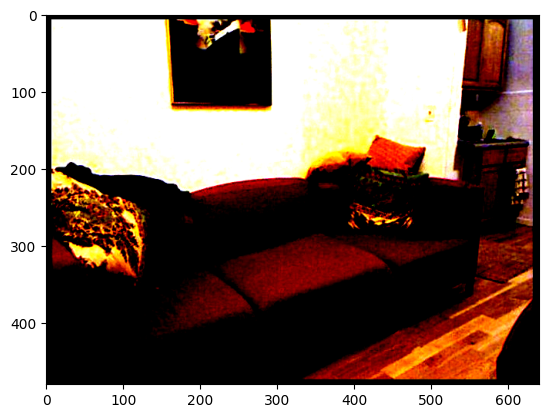

In [ ]:
image = np.asarray(Image.open(IMG_PATH), dtype=np.float32) / 255.0

image = torch.from_numpy(image.transpose((2, 0, 1)))
image = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(image)


plt.imshow(image.permute(1, 2, 0))

In [ ]:
K = np.array([[518.8579 / 4.0, 0, 325.5824 / 4.0, 0],
            [0, 518.8579 / 4.0, 253.7362 / 4.0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]], dtype=np.float32) 
inv_K = np.linalg.pinv(K)
inv_K = torch.from_numpy(inv_K)

In [ ]:
model.eval()
with torch.no_grad():
    image_torch = torch.Tensor(image.unsqueeze(0).cuda())
    inv_K_torch = torch.Tensor(inv_K.unsqueeze(0).cuda())

    depth1_list, uncer1_list, depth2_list, uncer2_list, normals, distances = model(image_torch, inv_K_torch, EPOCH)
    
    pred_depth = 0.5 * (depth1_list[-1] + depth2_list[-1])
    
    image_flipped = flip_lr(image_torch)
    depth1_list_flipped, uncer1_list_flipped, depth2_list_flipped, uncer2_list_flipped, normals_flipped, distances_flipped = model(image_flipped, inv_K_torch, EPOCH)
    pred_depth_flipped = 0.5 * (depth1_list_flipped[-1] + depth2_list_flipped[-1])
    pred_depth = post_process_depth(pred_depth, pred_depth_flipped)
    normals = (0.5 * (normals + 1)).permute(0, 2, 3, 1)

    pred_depth = pred_depth.cpu().numpy().squeeze()
    pred_normal = normals.cpu().numpy().squeeze()

In [ ]:
print(pred_depth)

[[2.780599  2.780599  2.6709442 ... 4.5242434 4.756771  4.756771 ]
 [2.780599  2.780599  2.6709442 ... 4.5242434 4.756771  4.756771 ]
 [2.7886522 2.7886522 2.6763573 ... 4.4938993 4.7321835 4.7321835]
 ...
 [2.533564  2.533564  2.373731  ... 2.541246  2.7106338 2.7106338]
 [2.5315142 2.5315142 2.3720727 ... 2.5316446 2.699108  2.699108 ]
 [2.5315142 2.5315142 2.3720727 ... 2.5316446 2.699108  2.699108 ]]


1.0729954 5.4081903


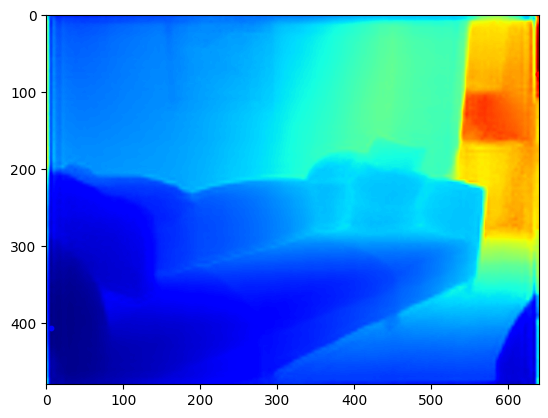

In [ ]:
pred_depth = np.reshape(pred_depth, (480, 640))
print(pred_depth.min(), pred_depth.max())
#pred_depth = pred_depth / pred_depth.max()
#Find index of max pred_depth
max_index = np.where(pred_depth == pred_depth.max())
min_index = np.where(pred_depth == pred_depth.min())

plt.imshow(pred_depth, cmap='jet')
plt.scatter(max_index[1], max_index[0], c='r', s=10)
plt.scatter(min_index[1], min_index[0], c='b', s=10)

0.0 4.475


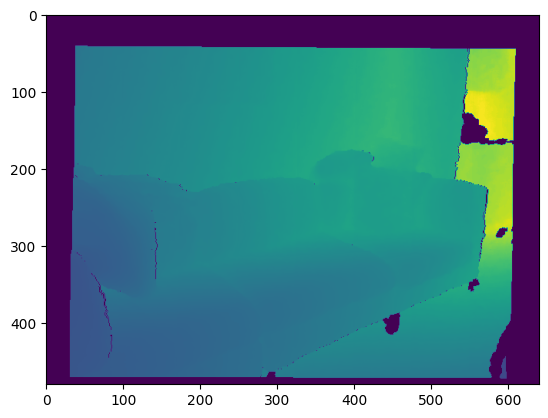

In [ ]:
depth = Image.open(DEPTH_PATH)
depth = np.reshape(depth, (480,640))/1000
print(depth.min(), depth.max())
plt.imshow(depth)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[np.float64(5.799367453482823), np.float64(0.04970090191532022), np.float64(0.020900006489539248), np.float64(0.15602054965998027), np.float64(0.010034108723608656), np.float64(0.06296376202514681), np.float64(0.9960503075056926), np.float64(0.9999531825243132), np.float64(1.0)]


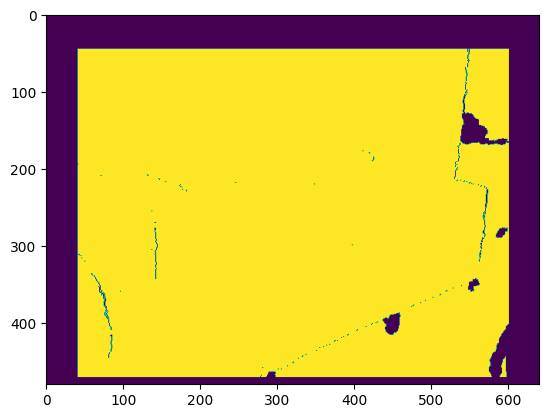

In [ ]:
valid_mask = np.logical_and(depth > 1e-3, depth < 10)
eval_mask = np.zeros(valid_mask.shape)
eval_mask[45:471, 41:601] = 1
valid_mask = np.logical_and(valid_mask, eval_mask)
print(valid_mask)
print(compute_errors(depth[valid_mask],pred_depth[valid_mask]))
plt.imshow(valid_mask)

In [ ]:
def depth_to_pcd(depth_image, intrinsic, ):
    # Get dimensions of the depth image
    height, width = depth_image.shape

    # Generate a grid of (x, y) coordinates
    x, y = np.meshgrid(np.arange(width), np.arange(height))

    # Flatten the arrays
    x = x.flatten()
    y = y.flatten()
    depth = depth_image.flatten()

    # Calculate 3D coordinates
    fx, fy, cx, cy = intrinsic[0], intrinsic[5], intrinsic[2], intrinsic[6]
    z = depth

    x_3d = (x - cx) * z / fx
    y_3d = (y - cy) * z / fy

    # Create a point cloud
    points = np.vstack((x_3d, y_3d, z)).T
    return points

In [ ]:
camera_K = K[:3,:3].flatten() * 4
coord = depth_to_pcd(pred_depth,camera_K)
color = Image.open(IMG_PATH)
color = color.resize((640, 480), Image.BILINEAR)
color = np.array(color, dtype=np.float64)
color = color.reshape(-1, 3)/255.0

coord = coord[valid_mask.flatten()]
color = color[valid_mask.flatten()]

color = np.delete(color, np.where(coord[:, 2] == 0), axis=0)
coord = np.delete(coord, np.where(coord[:, 2] == 0), axis=0)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(coord)
pcd.colors = o3d.utility.Vector3dVector(color)
o3d.visualization.draw_geometries([pcd])